In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [369]:
df_test = pd.read_csv('data/test_QyjYwdj.csv')
df_test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [370]:
df_test['customer_id'].value_counts

<bound method IndexOpsMixin.value_counts of 0         967
1        1566
2         510
3         361
4         811
5        1498
6         682
7        1186
8        1023
9         315
10        464
11        421
12       1323
13        527
14        744
15       1545
16        379
17       1082
18        232
19        569
20        769
21        942
22        565
23        922
24        554
25       1241
26        770
27        704
28        322
29       1134
         ... 
50196      46
50197    1475
50198     769
50199     162
50200     737
50201      60
50202     385
50203    1017
50204     954
50205    1400
50206     696
50207    1024
50208      15
50209     277
50210     627
50211    1194
50212     699
50213     931
50214    1566
50215     811
50216     289
50217     215
50218    1353
50219     351
50220     363
50221     501
50222     481
50223    1336
50224     748
50225     851
Name: customer_id, Length: 50226, dtype: int64>

In [371]:
df_train = pd.read_csv('data/train_AUpWtIz/train.csv')
df_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [372]:
df1 = pd.read_csv('data/train_AUpWtIz/campaign_data.csv')
df1.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [373]:
df1.isnull().sum()

campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

In [374]:
df2 = pd.read_csv('data/train_AUpWtIz/coupon_item_mapping.csv')
df2.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [375]:
df2.isnull().sum()

coupon_id    0
item_id      0
dtype: int64

In [376]:
df3 = pd.read_csv('data/train_AUpWtIz/customer_demographics.csv')
df3.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [377]:
df3.isnull().sum()

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [378]:
df3.drop(['marital_status','no_of_children'],axis=1,inplace=True)
df3.isnull().sum()

customer_id       0
age_range         0
rented            0
family_size       0
income_bracket    0
dtype: int64

In [379]:
df4 = pd.read_csv('data/train_AUpWtIz/customer_transaction_data.csv')
df4.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [380]:
df4.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [381]:
df5 = pd.read_csv('data/train_AUpWtIz/item_data.csv')
df5.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [382]:
df5.isnull().sum()

item_id       0
brand         0
brand_type    0
category      0
dtype: int64

In [388]:
df6 = pd.merge(df4,df2,on='item_id',how='left')
df6.head(3)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_id
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,7.0
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,20.0
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,29.0


In [389]:
df6.isnull().sum()

date                    0
customer_id             0
item_id                 0
quantity                0
selling_price           0
other_discount          0
coupon_discount         0
coupon_id          556134
dtype: int64

In [390]:
df6.dropna(inplace=True)

In [391]:
df7 = pd.merge(df6,df5,on='item_id',how='left')
df7.head(3)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_id,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,7.0,56,Local,Natural Products
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,20.0,56,Local,Natural Products
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,29.0,56,Local,Natural Products


In [392]:
df7.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
coupon_id          0
brand              0
brand_type         0
category           0
dtype: int64

In [393]:
df8 = pd.merge(df7,df3,on='customer_id',how='left')
df8.head(3)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_id,brand,brand_type,category,age_range,rented,family_size,income_bracket
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,7.0,56,Local,Natural Products,NaN,NaN,NaN,NaN
1,2012-01-02,1501,26830,1,35.26,-10.69,0.0,20.0,56,Local,Natural Products,NaN,NaN,NaN,NaN
2,2012-01-02,1501,26830,1,35.26,-10.69,0.0,29.0,56,Local,Natural Products,NaN,NaN,NaN,NaN


In [394]:
df8.isnull().sum()

date                    0
customer_id             0
item_id                 0
quantity                0
selling_price           0
other_discount          0
coupon_discount         0
coupon_id               0
brand                   0
brand_type              0
category                0
age_range          839588
rented             839588
family_size        839588
income_bracket     839588
dtype: int64

In [395]:
df8.dropna(inplace=True)

In [396]:
df_train_1 = pd.merge(df_train,df8,on=['customer_id','coupon_id'],how='left')
df_train_1.head(3)

,id,campaign_id,coupon_id,customer_id,redemption_status,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,rented,family_size,income_bracket
0,1,13,27,1053,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,13,116,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,9,635,205,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [397]:
df_train_1.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
date                 69874
item_id              69874
quantity             69874
selling_price        69874
other_discount       69874
coupon_discount      69874
brand                69874
brand_type           69874
category             69874
age_range            69874
rented               69874
family_size          69874
income_bracket       69874
dtype: int64

In [398]:
df_train_1.dropna(inplace=True)

In [399]:
pd.set_option('display.max_columns', None)

In [400]:
df_train_2 = pd.merge(df_train_1,df1,on='campaign_id',how='left')
df_train_2.head(3)

,id,campaign_id,coupon_id,customer_id,redemption_status,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,rented,family_size,income_bracket,campaign_type,start_date,end_date
0,15,29,538,368,0,2013-05-30,9962.0,1.0,45.95,0.00,0.0,278.0,Established,Grocery,36-45,0.0,1,5.0,Y,08/10/12,30/11/12
1,15,29,538,368,0,2013-05-30,29027.0,1.0,45.95,0.00,0.0,278.0,Established,Grocery,36-45,0.0,1,5.0,Y,08/10/12,30/11/12
2,21,13,1028,89,0,2012-06-24,52056.0,1.0,71.24,-28.14,0.0,1639.0,Established,Grocery,46-55,0.0,1,3.0,X,19/05/13,05/07/13


In [401]:
df_train_2.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
date                 0
item_id              0
quantity             0
selling_price        0
other_discount       0
coupon_discount      0
brand                0
brand_type           0
category             0
age_range            0
rented               0
family_size          0
income_bracket       0
campaign_type        0
start_date           0
end_date             0
dtype: int64

In [402]:
df_train_2['age_range'].unique(),df_train_2['brand_type'].unique(),df_train_2['category'].unique(),df_train_2['campaign_type'].unique(),df_train_2['family_size'].unique()

(array(['36-45', '46-55', '26-35', '56-70', '70+', '18-25'], dtype=object),
 array(['Established', 'Local'], dtype=object),
 array(['Grocery', 'Pharmaceutical', 'Packaged Meat', 'Meat', 'Seafood',
        'Natural Products', 'Flowers & Plants', 'Dairy, Juices & Snacks',
        'Miscellaneous', 'Skin & Hair Care', 'Bakery', 'Prepared Food',
        'Garden', 'Travel', 'Salads', 'Vegetables (cut)'], dtype=object),
 array(['Y', 'X'], dtype=object),
 array(['1', '3', '2', '4', '5+'], dtype=object))

In [403]:
age = pd.get_dummies(df_train_2['age_range'],drop_first=True)
brand = pd.get_dummies(df_train_2['brand_type'],drop_first=True)
category = pd.get_dummies(df_train_2['category'],drop_first=True)
campaign = pd.get_dummies(df_train_2['campaign_type'],drop_first=True)

In [404]:
# df_train_2['date'] = df_train_2['date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d', errors='ignore'))

In [405]:
# date_data = df_train_2['date']

# date = pd.DataFrame({'year':date_data.dt.year,
#                      'month':date_data.dt.month,
#                     'week':date_data.dt.week,
#                     'dayofweek':date_data.dt.dayofweek, #date_data.dt.weekday
#                     'dayofyear':date_data.dt.dayofyear})

In [406]:
df_train_2.drop(['age_range','brand_type','category','campaign_type','date','start_date','end_date'],axis=1,inplace=True)

In [407]:
train_data = pd.concat([df_train_2,age,brand,category,campaign],axis=1)
train_data.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,family_size,income_bracket,26-35,36-45,46-55,56-70,70+,Local,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
0,15,29,538,368,0,9962.0,1.0,45.95,0.00,0.0,278.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,15,29,538,368,0,29027.0,1.0,45.95,0.00,0.0,278.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,21,13,1028,89,0,52056.0,1.0,71.24,-28.14,0.0,1639.0,0.0,1,3.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,22,9,705,712,0,30345.0,2.0,178.10,-54.85,0.0,714.0,0.0,3,5.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,22,9,705,712,0,4904.0,1.0,113.63,-39.18,0.0,714.0,0.0,3,5.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [408]:
train_data.shape

(94855, 36)

In [409]:
df_test.shape

(50226, 4)

In [453]:
df_test_1 = pd.merge(df_test,df8,on=['customer_id','coupon_id'],how='left')
df_test_1.head(3)

,id,campaign_id,coupon_id,customer_id,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,rented,family_size,income_bracket
0,3,22,869,967,2012-04-25,28731.0,1.0,83.35,-48.09,0.0,1075.0,Established,Grocery,36-45,0.0,1,5.0
1,3,22,869,967,2012-05-03,28731.0,1.0,83.35,-48.09,0.0,1075.0,Established,Grocery,36-45,0.0,1,5.0
2,3,22,869,967,2012-05-17,28731.0,1.0,120.75,-10.69,0.0,1075.0,Established,Grocery,36-45,0.0,1,5.0


In [454]:
df_test_1.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
date               41643
item_id            41643
quantity           41643
selling_price      41643
other_discount     41643
coupon_discount    41643
brand              41643
brand_type         41643
category           41643
age_range          41643
rented             41643
family_size        41643
income_bracket     41643
dtype: int64

In [427]:
df_test.shape

(50226, 4)

In [428]:
# df_test_1.dropna(inplace=True)

In [459]:
df_test_2 = pd.merge(df_test_1,df1,on='campaign_id',how='left')
df_test_2.head(3)

,id,campaign_id,coupon_id,customer_id,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category,age_range,rented,family_size,income_bracket,campaign_type,start_date,end_date
0,3,22,869,967,2012-04-25,28731.0,1.0,83.35,-48.09,0.0,1075.0,Established,Grocery,36-45,0.0,1,5.0,X,16/09/13,18/10/13
1,3,22,869,967,2012-05-03,28731.0,1.0,83.35,-48.09,0.0,1075.0,Established,Grocery,36-45,0.0,1,5.0,X,16/09/13,18/10/13
2,3,22,869,967,2012-05-17,28731.0,1.0,120.75,-10.69,0.0,1075.0,Established,Grocery,36-45,0.0,1,5.0,X,16/09/13,18/10/13


In [460]:
df_test_2.isnull().sum()

id                     0
campaign_id            0
coupon_id              0
customer_id            0
date               41643
item_id            41643
quantity           41643
selling_price      41643
other_discount     41643
coupon_discount    41643
brand              41643
brand_type         41643
category           41643
age_range          41643
rented             41643
family_size        41643
income_bracket     41643
campaign_type          0
start_date             0
end_date               0
dtype: int64

In [461]:
df_test_2.shape

(132065, 20)

In [464]:
df_test_2.fillna(0,inplace=True)
df_test_2.isnull().sum()

id                 0
campaign_id        0
coupon_id          0
customer_id        0
date               0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
brand              0
brand_type         0
category           0
age_range          0
rented             0
family_size        0
income_bracket     0
campaign_type      0
start_date         0
end_date           0
dtype: int64

In [465]:
age_test = pd.get_dummies(df_test_2['age_range'],drop_first=True)
brand_test = pd.get_dummies(df_test_2['brand_type'],drop_first=True)
category_test = pd.get_dummies(df_test_2['category'],drop_first=True)
campaign_test = pd.get_dummies(df_test_2['campaign_type'],drop_first=True)

In [466]:
df_test_2.drop(['age_range','brand_type','category','campaign_type','date','start_date','end_date'],axis=1,inplace=True)

In [467]:
test_data = pd.concat([df_test_2,age_test,brand_test,category_test,campaign_test],axis=1)
test_data.replace(to_replace='5+',value=5,inplace=True)
test_data.head()

,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,family_size,income_bracket,18-25,26-35,36-45,46-55,56-70,70+,Established,Local,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
0,3,22,869,967,28731.0,1.0,83.35,-48.09,0.0,1075.0,0.0,1,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3,22,869,967,28731.0,1.0,83.35,-48.09,0.0,1075.0,0.0,1,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,22,869,967,28731.0,1.0,120.75,-10.69,0.0,1075.0,0.0,1,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,22,869,967,30981.0,1.0,120.75,-10.69,0.0,1075.0,0.0,1,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3,22,869,967,28731.0,1.0,127.88,-3.56,0.0,1075.0,0.0,1,5.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [469]:
test = pd.DataFrame(columns=test_data.columns)
# test_id=0

customer = test_data['id'].unique()
print(customer.shape)
for i,cus in enumerate(customer):
    print(i)
    trial_data = test_data[test_data['id']==cus]
    mean = np.mean(trial_data.convert_objects(convert_numeric=True).values,axis=0).astype('int32')
    test = test.append(pd.DataFrame(mean.reshape(1,38),columns=test_data.columns),ignore_index=True)
    
    

(50226,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':



116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365

2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220


3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880


5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538


7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231


8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906


10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
1046

11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
1184

13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
1324

14448
14449
14450
14451
14452
14453
14454
14455
14456
14457
14458
14459
14460
14461
14462
14463
14464
14465
14466
14467
14468
14469
14470
14471
14472
14473
14474
14475
14476
14477
14478
14479
14480
14481
14482
14483
14484
14485
14486
14487
14488
14489
14490
14491
14492
14493
14494
14495
14496
14497
14498
14499
14500
14501
14502
14503
14504
14505
14506
14507
14508
14509
14510
14511
14512
14513
14514
14515
14516
14517
14518
14519
14520
14521
14522
14523
14524
14525
14526
14527
14528
14529
14530
14531
14532
14533
14534
14535
14536
14537
14538
14539
14540
14541
14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
1461

15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
1599

17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
1739

18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
1876

19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
2014

21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21418
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
21442
21443
21444
21445
21446
21447
21448
21449
21450
21451
21452
21453
21454
21455
21456
21457
21458
21459
21460
21461
21462
21463
21464
21465
21466
21467
21468
21469
21470
21471
21472
21473
21474
21475
21476
21477
21478
21479
21480
21481
21482
21483
21484
21485
21486
21487
21488
21489
21490
21491
21492
21493
21494
21495
21496
21497
21498
21499
21500
21501
21502
21503
21504
21505
21506
21507
21508
21509
21510
21511
21512
21513
21514
2151

22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
2291

24135
24136
24137
24138
24139
24140
24141
24142
24143
24144
24145
24146
24147
24148
24149
24150
24151
24152
24153
24154
24155
24156
24157
24158
24159
24160
24161
24162
24163
24164
24165
24166
24167
24168
24169
24170
24171
24172
24173
24174
24175
24176
24177
24178
24179
24180
24181
24182
24183
24184
24185
24186
24187
24188
24189
24190
24191
24192
24193
24194
24195
24196
24197
24198
24199
24200
24201
24202
24203
24204
24205
24206
24207
24208
24209
24210
24211
24212
24213
24214
24215
24216
24217
24218
24219
24220
24221
24222
24223
24224
24225
24226
24227
24228
24229
24230
24231
24232
24233
24234
24235
24236
24237
24238
24239
24240
24241
24242
24243
24244
24245
24246
24247
24248
24249
24250
24251
24252
24253
24254
24255
24256
24257
24258
24259
24260
24261
24262
24263
24264
24265
24266
24267
24268
24269
24270
24271
24272
24273
24274
24275
24276
24277
24278
24279
24280
24281
24282
24283
24284
24285
24286
24287
24288
24289
24290
24291
24292
24293
24294
24295
24296
24297
24298
24299
24300
2430

25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
2567

26889
26890
26891
26892
26893
26894
26895
26896
26897
26898
26899
26900
26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
2705

28269
28270
28271
28272
28273
28274
28275
28276
28277
28278
28279
28280
28281
28282
28283
28284
28285
28286
28287
28288
28289
28290
28291
28292
28293
28294
28295
28296
28297
28298
28299
28300
28301
28302
28303
28304
28305
28306
28307
28308
28309
28310
28311
28312
28313
28314
28315
28316
28317
28318
28319
28320
28321
28322
28323
28324
28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
2843

29644
29645
29646
29647
29648
29649
29650
29651
29652
29653
29654
29655
29656
29657
29658
29659
29660
29661
29662
29663
29664
29665
29666
29667
29668
29669
29670
29671
29672
29673
29674
29675
29676
29677
29678
29679
29680
29681
29682
29683
29684
29685
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
2981

31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
3119

32393
32394
32395
32396
32397
32398
32399
32400
32401
32402
32403
32404
32405
32406
32407
32408
32409
32410
32411
32412
32413
32414
32415
32416
32417
32418
32419
32420
32421
32422
32423
32424
32425
32426
32427
32428
32429
32430
32431
32432
32433
32434
32435
32436
32437
32438
32439
32440
32441
32442
32443
32444
32445
32446
32447
32448
32449
32450
32451
32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32546
32547
32548
32549
32550
32551
32552
32553
32554
32555
32556
32557
32558
3255

33759
33760
33761
33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
3392

35143
35144
35145
35146
35147
35148
35149
35150
35151
35152
35153
35154
35155
35156
35157
35158
35159
35160
35161
35162
35163
35164
35165
35166
35167
35168
35169
35170
35171
35172
35173
35174
35175
35176
35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
3530

36515
36516
36517
36518
36519
36520
36521
36522
36523
36524
36525
36526
36527
36528
36529
36530
36531
36532
36533
36534
36535
36536
36537
36538
36539
36540
36541
36542
36543
36544
36545
36546
36547
36548
36549
36550
36551
36552
36553
36554
36555
36556
36557
36558
36559
36560
36561
36562
36563
36564
36565
36566
36567
36568
36569
36570
36571
36572
36573
36574
36575
36576
36577
36578
36579
36580
36581
36582
36583
36584
36585
36586
36587
36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
3668

37889
37890
37891
37892
37893
37894
37895
37896
37897
37898
37899
37900
37901
37902
37903
37904
37905
37906
37907
37908
37909
37910
37911
37912
37913
37914
37915
37916
37917
37918
37919
37920
37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
37933
37934
37935
37936
37937
37938
37939
37940
37941
37942
37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37961
37962
37963
37964
37965
37966
37967
37968
37969
37970
37971
37972
37973
37974
37975
37976
37977
37978
37979
37980
37981
37982
37983
37984
37985
37986
37987
37988
37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
3805

39256
39257
39258
39259
39260
39261
39262
39263
39264
39265
39266
39267
39268
39269
39270
39271
39272
39273
39274
39275
39276
39277
39278
39279
39280
39281
39282
39283
39284
39285
39286
39287
39288
39289
39290
39291
39292
39293
39294
39295
39296
39297
39298
39299
39300
39301
39302
39303
39304
39305
39306
39307
39308
39309
39310
39311
39312
39313
39314
39315
39316
39317
39318
39319
39320
39321
39322
39323
39324
39325
39326
39327
39328
39329
39330
39331
39332
39333
39334
39335
39336
39337
39338
39339
39340
39341
39342
39343
39344
39345
39346
39347
39348
39349
39350
39351
39352
39353
39354
39355
39356
39357
39358
39359
39360
39361
39362
39363
39364
39365
39366
39367
39368
39369
39370
39371
39372
39373
39374
39375
39376
39377
39378
39379
39380
39381
39382
39383
39384
39385
39386
39387
39388
39389
39390
39391
39392
39393
39394
39395
39396
39397
39398
39399
39400
39401
39402
39403
39404
39405
39406
39407
39408
39409
39410
39411
39412
39413
39414
39415
39416
39417
39418
39419
39420
39421
3942

40634
40635
40636
40637
40638
40639
40640
40641
40642
40643
40644
40645
40646
40647
40648
40649
40650
40651
40652
40653
40654
40655
40656
40657
40658
40659
40660
40661
40662
40663
40664
40665
40666
40667
40668
40669
40670
40671
40672
40673
40674
40675
40676
40677
40678
40679
40680
40681
40682
40683
40684
40685
40686
40687
40688
40689
40690
40691
40692
40693
40694
40695
40696
40697
40698
40699
40700
40701
40702
40703
40704
40705
40706
40707
40708
40709
40710
40711
40712
40713
40714
40715
40716
40717
40718
40719
40720
40721
40722
40723
40724
40725
40726
40727
40728
40729
40730
40731
40732
40733
40734
40735
40736
40737
40738
40739
40740
40741
40742
40743
40744
40745
40746
40747
40748
40749
40750
40751
40752
40753
40754
40755
40756
40757
40758
40759
40760
40761
40762
40763
40764
40765
40766
40767
40768
40769
40770
40771
40772
40773
40774
40775
40776
40777
40778
40779
40780
40781
40782
40783
40784
40785
40786
40787
40788
40789
40790
40791
40792
40793
40794
40795
40796
40797
40798
40799
4080

42002
42003
42004
42005
42006
42007
42008
42009
42010
42011
42012
42013
42014
42015
42016
42017
42018
42019
42020
42021
42022
42023
42024
42025
42026
42027
42028
42029
42030
42031
42032
42033
42034
42035
42036
42037
42038
42039
42040
42041
42042
42043
42044
42045
42046
42047
42048
42049
42050
42051
42052
42053
42054
42055
42056
42057
42058
42059
42060
42061
42062
42063
42064
42065
42066
42067
42068
42069
42070
42071
42072
42073
42074
42075
42076
42077
42078
42079
42080
42081
42082
42083
42084
42085
42086
42087
42088
42089
42090
42091
42092
42093
42094
42095
42096
42097
42098
42099
42100
42101
42102
42103
42104
42105
42106
42107
42108
42109
42110
42111
42112
42113
42114
42115
42116
42117
42118
42119
42120
42121
42122
42123
42124
42125
42126
42127
42128
42129
42130
42131
42132
42133
42134
42135
42136
42137
42138
42139
42140
42141
42142
42143
42144
42145
42146
42147
42148
42149
42150
42151
42152
42153
42154
42155
42156
42157
42158
42159
42160
42161
42162
42163
42164
42165
42166
42167
4216

43384
43385
43386
43387
43388
43389
43390
43391
43392
43393
43394
43395
43396
43397
43398
43399
43400
43401
43402
43403
43404
43405
43406
43407
43408
43409
43410
43411
43412
43413
43414
43415
43416
43417
43418
43419
43420
43421
43422
43423
43424
43425
43426
43427
43428
43429
43430
43431
43432
43433
43434
43435
43436
43437
43438
43439
43440
43441
43442
43443
43444
43445
43446
43447
43448
43449
43450
43451
43452
43453
43454
43455
43456
43457
43458
43459
43460
43461
43462
43463
43464
43465
43466
43467
43468
43469
43470
43471
43472
43473
43474
43475
43476
43477
43478
43479
43480
43481
43482
43483
43484
43485
43486
43487
43488
43489
43490
43491
43492
43493
43494
43495
43496
43497
43498
43499
43500
43501
43502
43503
43504
43505
43506
43507
43508
43509
43510
43511
43512
43513
43514
43515
43516
43517
43518
43519
43520
43521
43522
43523
43524
43525
43526
43527
43528
43529
43530
43531
43532
43533
43534
43535
43536
43537
43538
43539
43540
43541
43542
43543
43544
43545
43546
43547
43548
43549
4355

44754
44755
44756
44757
44758
44759
44760
44761
44762
44763
44764
44765
44766
44767
44768
44769
44770
44771
44772
44773
44774
44775
44776
44777
44778
44779
44780
44781
44782
44783
44784
44785
44786
44787
44788
44789
44790
44791
44792
44793
44794
44795
44796
44797
44798
44799
44800
44801
44802
44803
44804
44805
44806
44807
44808
44809
44810
44811
44812
44813
44814
44815
44816
44817
44818
44819
44820
44821
44822
44823
44824
44825
44826
44827
44828
44829
44830
44831
44832
44833
44834
44835
44836
44837
44838
44839
44840
44841
44842
44843
44844
44845
44846
44847
44848
44849
44850
44851
44852
44853
44854
44855
44856
44857
44858
44859
44860
44861
44862
44863
44864
44865
44866
44867
44868
44869
44870
44871
44872
44873
44874
44875
44876
44877
44878
44879
44880
44881
44882
44883
44884
44885
44886
44887
44888
44889
44890
44891
44892
44893
44894
44895
44896
44897
44898
44899
44900
44901
44902
44903
44904
44905
44906
44907
44908
44909
44910
44911
44912
44913
44914
44915
44916
44917
44918
44919
4492

46124
46125
46126
46127
46128
46129
46130
46131
46132
46133
46134
46135
46136
46137
46138
46139
46140
46141
46142
46143
46144
46145
46146
46147
46148
46149
46150
46151
46152
46153
46154
46155
46156
46157
46158
46159
46160
46161
46162
46163
46164
46165
46166
46167
46168
46169
46170
46171
46172
46173
46174
46175
46176
46177
46178
46179
46180
46181
46182
46183
46184
46185
46186
46187
46188
46189
46190
46191
46192
46193
46194
46195
46196
46197
46198
46199
46200
46201
46202
46203
46204
46205
46206
46207
46208
46209
46210
46211
46212
46213
46214
46215
46216
46217
46218
46219
46220
46221
46222
46223
46224
46225
46226
46227
46228
46229
46230
46231
46232
46233
46234
46235
46236
46237
46238
46239
46240
46241
46242
46243
46244
46245
46246
46247
46248
46249
46250
46251
46252
46253
46254
46255
46256
46257
46258
46259
46260
46261
46262
46263
46264
46265
46266
46267
46268
46269
46270
46271
46272
46273
46274
46275
46276
46277
46278
46279
46280
46281
46282
46283
46284
46285
46286
46287
46288
46289
4629

47493
47494
47495
47496
47497
47498
47499
47500
47501
47502
47503
47504
47505
47506
47507
47508
47509
47510
47511
47512
47513
47514
47515
47516
47517
47518
47519
47520
47521
47522
47523
47524
47525
47526
47527
47528
47529
47530
47531
47532
47533
47534
47535
47536
47537
47538
47539
47540
47541
47542
47543
47544
47545
47546
47547
47548
47549
47550
47551
47552
47553
47554
47555
47556
47557
47558
47559
47560
47561
47562
47563
47564
47565
47566
47567
47568
47569
47570
47571
47572
47573
47574
47575
47576
47577
47578
47579
47580
47581
47582
47583
47584
47585
47586
47587
47588
47589
47590
47591
47592
47593
47594
47595
47596
47597
47598
47599
47600
47601
47602
47603
47604
47605
47606
47607
47608
47609
47610
47611
47612
47613
47614
47615
47616
47617
47618
47619
47620
47621
47622
47623
47624
47625
47626
47627
47628
47629
47630
47631
47632
47633
47634
47635
47636
47637
47638
47639
47640
47641
47642
47643
47644
47645
47646
47647
47648
47649
47650
47651
47652
47653
47654
47655
47656
47657
47658
4765

48863
48864
48865
48866
48867
48868
48869
48870
48871
48872
48873
48874
48875
48876
48877
48878
48879
48880
48881
48882
48883
48884
48885
48886
48887
48888
48889
48890
48891
48892
48893
48894
48895
48896
48897
48898
48899
48900
48901
48902
48903
48904
48905
48906
48907
48908
48909
48910
48911
48912
48913
48914
48915
48916
48917
48918
48919
48920
48921
48922
48923
48924
48925
48926
48927
48928
48929
48930
48931
48932
48933
48934
48935
48936
48937
48938
48939
48940
48941
48942
48943
48944
48945
48946
48947
48948
48949
48950
48951
48952
48953
48954
48955
48956
48957
48958
48959
48960
48961
48962
48963
48964
48965
48966
48967
48968
48969
48970
48971
48972
48973
48974
48975
48976
48977
48978
48979
48980
48981
48982
48983
48984
48985
48986
48987
48988
48989
48990
48991
48992
48993
48994
48995
48996
48997
48998
48999
49000
49001
49002
49003
49004
49005
49006
49007
49008
49009
49010
49011
49012
49013
49014
49015
49016
49017
49018
49019
49020
49021
49022
49023
49024
49025
49026
49027
49028
4902

In [440]:
test = pd.DataFrame(columns=test_data.columns)
# test_id=0

customer = test_data['id'].unique()
print(customer.shape)
for i,cus in enumerate(customer):
    print(i)
    trial_data = test_data[test_data['id']==cus]
    ids = trial_data['item_id'].unique()
    
    for test_id in ids:
        mean = np.mean(trial_data[trial_data['item_id']==test_id].convert_objects(convert_numeric=True).values,axis=0).astype('int32')
        test = test.append(pd.DataFrame(mean.reshape(1,35),columns=test_data.columns),ignore_index=True)
    
    

(675,)
0
1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [471]:
test_data.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'item_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'brand', 'rented',
       'family_size', 'income_bracket', '18-25', '26-35', '36-45', '46-55',
       '56-70', '70+', 'Established', 'Local', 'Bakery',
       'Dairy, Juices & Snacks', 'Flowers & Plants', 'Garden', 'Grocery',
       'Meat', 'Miscellaneous', 'Natural Products', 'Packaged Meat',
       'Pharmaceutical', 'Prepared Food', 'Salads', 'Seafood',
       'Skin & Hair Care', 'Travel', 'Vegetables (cut)', 'Y'],
      dtype='object')

In [470]:
test.shape,df_test.shape

((50226, 38), (50226, 4))

In [144]:
unique, counts = np.unique(test_data['id'].values, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     3     15]
 [     4     11]
 [    18      4]
 ...
 [128588      3]
 [128591      8]
 [128593      2]]


In [148]:
np.sum(counts),test_data.shape

(90422, (90422, 35))

In [235]:
test_data[test_data['id']==119]

,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,family_size,income_bracket,26-35,36-45,46-55,56-70,70+,Local,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
51,119,18,698,378,24416.0,1.0,71.24,-31.7,0.0,702.0,0.0,5+,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
(np.sum(test_data[test_data['id']==116].convert_objects(convert_numeric=True),axis=0)/test_data[test_data['id']==116].shape[0]).astype('int32')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


id                          116
campaign_id                  19
coupon_id                   455
customer_id                 928
item_id                   40608
quantity                      1
selling_price                61
other_discount               -1
coupon_discount              -5
brand                       158
rented                        0
family_size                   1
income_bracket                2
26-35                         0
36-45                         0
46-55                         1
56-70                         0
70+                           0
Local                         0
Dairy, Juices & Snacks        0
Flowers & Plants              0
Garden                        0
Grocery                       0
Meat                          0
Miscellaneous                 0
Natural Products              0
Packaged Meat                 0
Pharmaceutical                1
Prepared Food                 0
Salads                        0
Seafood                       0
Skin & H

In [202]:
np.mean(test_data[test_data['id']==116].convert_objects(convert_numeric=True).values,axis=0).astype('int32')
#pd.to_numeric(df['col'], errors='coerce')
np.mean(test_data[test_data['id']==test_id].convert_objects(convert_numeric=True).values,axis=0).astype('int32')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


array([  116,    19,   455,   928, 40608,     1,    61,    -1,    -5,
         158,     0,     1,     2,     0,     0,     1,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           1,     0,     0,     0,     0,     0,     0,     1])

In [452]:
df_test['id'].unique().shape

(50226,)

In [445]:
test_data[test_data['id']==3]

,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,family_size,income_bracket,26-35,36-45,46-55,56-70,70+,Local,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
0,3,22,869,967,28731.0,1.0,83.35,-48.09,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3,22,869,967,28731.0,1.0,83.35,-48.09,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,22,869,967,28731.0,1.0,120.75,-10.69,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,22,869,967,30981.0,1.0,120.75,-10.69,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,3,22,869,967,28731.0,1.0,127.88,-3.56,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,3,22,869,967,28731.0,1.0,120.75,-10.69,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,3,22,869,967,28731.0,1.0,120.75,-10.69,-35.62,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,3,22,869,967,16344.0,1.0,106.50,-89.05,-35.62,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,3,22,869,967,4803.0,1.0,177.74,-42.74,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,3,22,869,967,28051.0,1.0,177.74,-42.74,0.00,1075.0,0.0,1,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [449]:
df_test[df_test['customer_id']==967]

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1745,4382,18,717,967
2742,6832,25,1016,967
3569,8887,18,640,967
4814,12129,18,962,967
7926,20104,16,938,967
8243,20927,18,680,967
10502,26710,22,492,967
10558,26876,22,907,967
10741,27373,16,35,967


In [307]:
test = pd.DataFrame(columns=test_data.columns)

In [193]:
np.mean(test_data[test_data['id']==3].convert_objects(convert_numeric=True).values,axis=0).astype('int32').reshape(1,35)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


array([[    3,    22,   869,   967, 22532,     1,   132,   -33,    -4,
         1075,     0,     1,     5,     0,     1,     0,     0,     0,
            0,     0,     0,     0,     1,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]])

In [194]:
pd.DataFrame(np.mean(test_data[test_data['id']==3].convert_objects(convert_numeric=True).values,axis=0).astype('int32').reshape(1,35),columns=test_data.columns)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,family_size,income_bracket,26-35,36-45,46-55,56-70,70+,Local,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
0,3,22,869,967,22532,1,132,-33,-4,1075,0,1,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [306]:
test.append(pd.DataFrame(np.mean(test_data[test_data['id']==116].convert_objects(convert_numeric=True).values,axis=0).astype('int32').reshape(1,35),columns=test_data.columns))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,id,campaign_id,coupon_id,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,family_size,income_bracket,26-35,36-45,46-55,56-70,70+,Local,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
0,116,19,455,928,40608,1,61,-1,-5,158,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [309]:
test.shape

(0, 35)

In [68]:
train_data.describe()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,quantity,selling_price,other_discount,coupon_discount,brand,rented,income_bracket,26-35,36-45,46-55,56-70,70+,Local,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut),Y
count,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000,94855.000000
mean,62029.018523,12.072437,281.853165,827.654768,0.172611,29164.046661,1.330083,107.921193,-22.080460,-1.423404,885.199568,0.055295,5.016393,0.206663,0.282695,0.327363,0.071372,0.063117,0.221127,0.014918,0.001729,0.000833,0.652037,0.030257,0.000485,0.063855,0.086891,0.131959,0.001634,0.000369,0.010732,0.003553,0.000306,0.000042,0.197818
std,37130.324507,5.482577,357.559199,476.872601,0.377912,17922.278520,0.904483,104.522956,38.854106,8.280115,1046.976694,0.228556,2.311960,0.404914,0.450312,0.469253,0.257447,0.243175,0.415008,0.121223,0.041545,0.028847,0.476327,0.171294,0.022016,0.244496,0.281676,0.338448,0.040391,0.019206,0.103039,0.059500,0.017483,0.006494,0.398356
min,15.000000,1.000000,1.000000,1.000000,0.000000,31.000000,1.000000,1.070000,-1175.100000,-534.300000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29780.000000,8.000000,21.000000,434.000000,0.000000,14165.500000,1.000000,53.430000,-32.060000,0.000000,89.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62599.000000,13.000000,23.000000,828.000000,0.000000,25687.000000,1.000000,88.690000,-7.120000,0.000000,681.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,93136.000000,13.000000,598.000000,1259.000000,0.000000,37302.000000,1.000000,124.670000,0.000000,0.000000,1149.000000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,128500.000000,30.000000,1112.000000,1581.000000,1.000000,74054.000000,54.000000,3846.960000,0.000000,0.000000,5468.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
train_data['redemption_status'].value_counts()

0    78482
1    16373
Name: redemption_status, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020016E96DD8>,
      dtype=object)

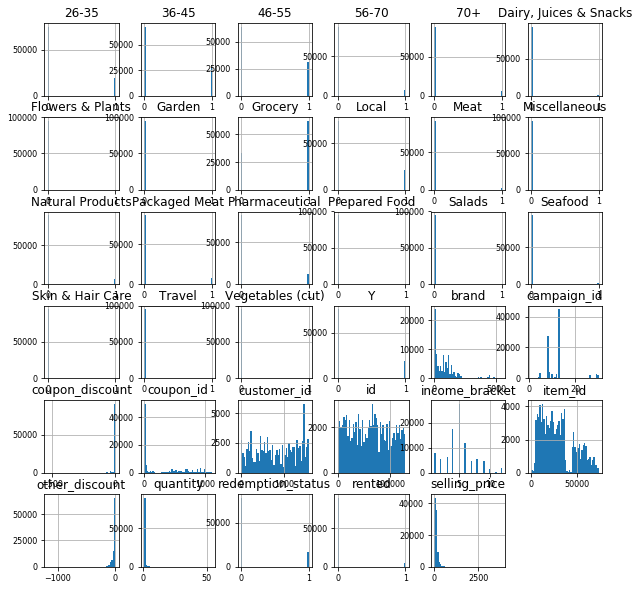

In [70]:
train_data.hist(figsize=(10,10), bins=50, xlabelsize=8, ylabelsize=8)

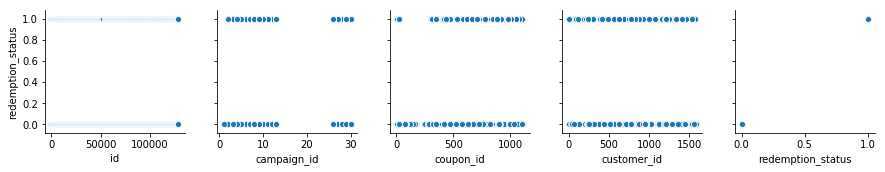

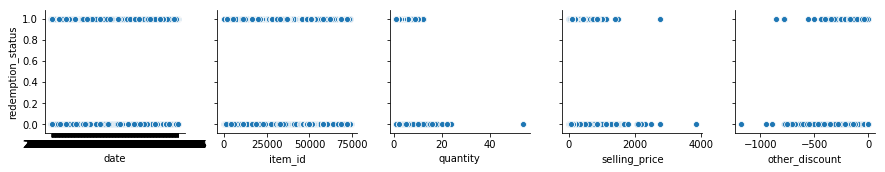

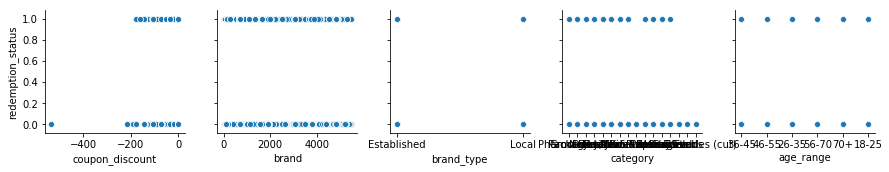

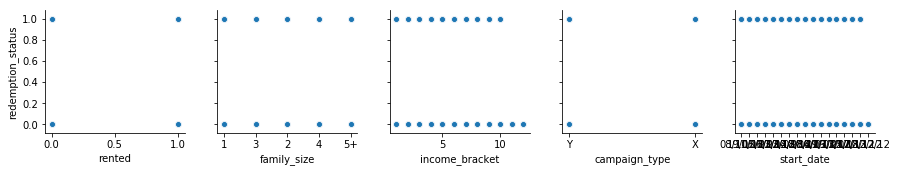

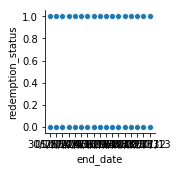

In [33]:
for i in range(0, len(df_train_2.columns),5):
    sns.pairplot(data=df_train_2, x_vars=df_train_2.columns[i:i+5], y_vars=['redemption_status'])

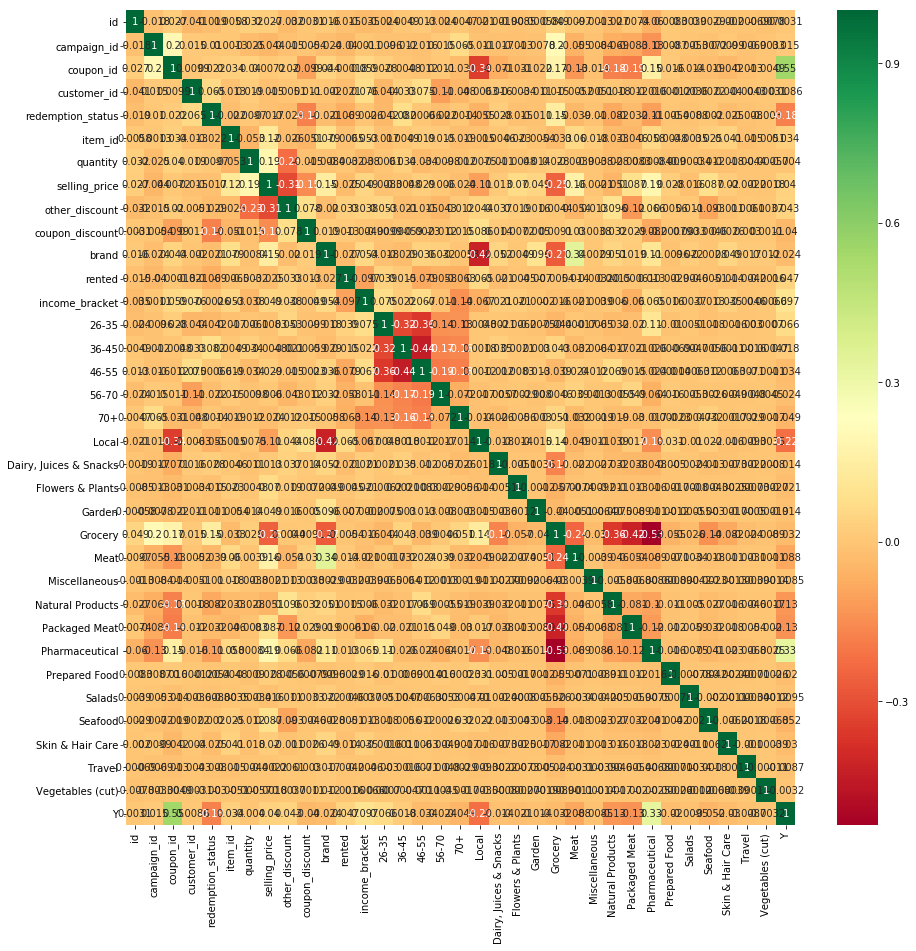

In [72]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g = sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [73]:
df_num_corr = train_data.corr()['redemption_status']
golden_features_list = df_num_corr[abs(df_num_corr)>0.25].sort_values(ascending=False)
print("There is {} strongly correlated values with Clicks:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Clicks:
redemption_status    1.0
Name: redemption_status, dtype: float64


In [386]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [384]:
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [387]:
result = pd.merge(left, right, on=['key1', 'key2'],how='left',indicator=True)
result

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only
